<a href="https://colab.research.google.com/github/RozaRostamnejad/DS-2024-Project-A4-Group-1/blob/main/A4_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project A4: KAGGLE-CLINVAR

# 1. Data loading and Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('clinvar_conflicting.csv')

<ipython-input-4-b2be5afbcb2d>:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar_conflicting.csv')


DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar_conflicting.csv') **bold text**

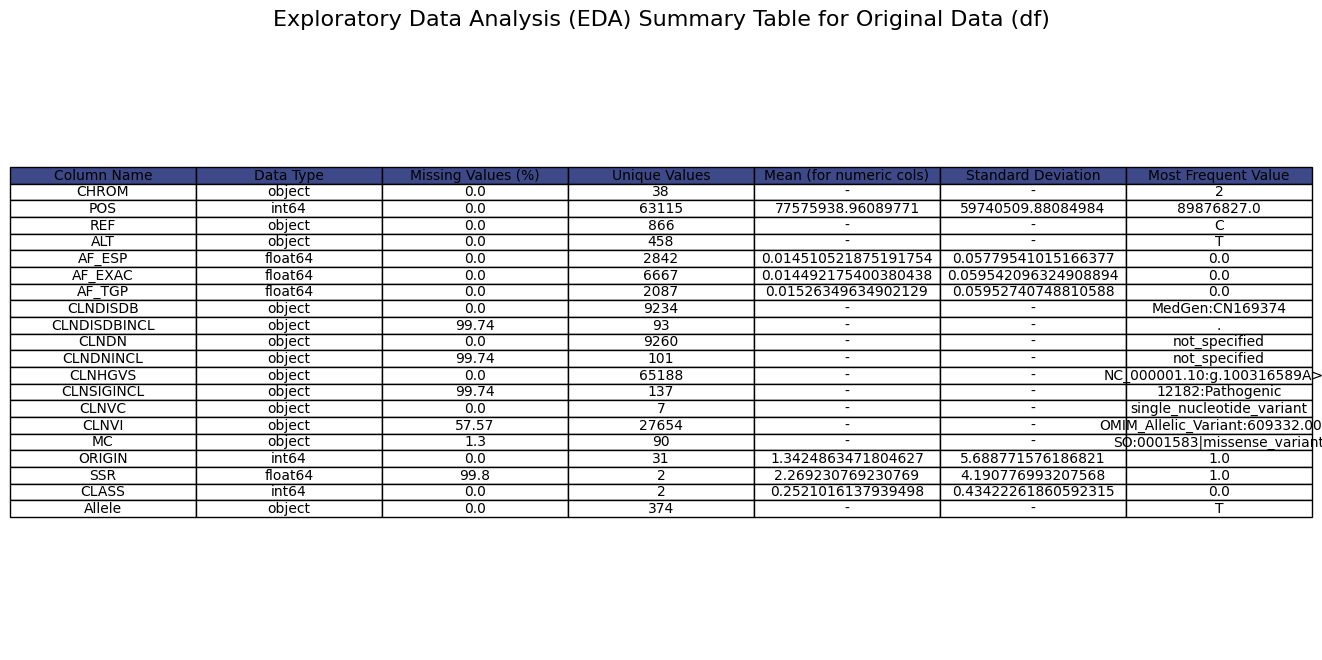

,Column Name,Data Type,Missing Values (%),Unique Values,Mean (for numeric cols),Standard Deviation,Most Frequent Value
CHROM,CHROM,object,0.00,38,-,-,2
POS,POS,int64,0.00,63115,77575938.960898,59740509.88085,89876827.0
REF,REF,object,0.00,866,-,-,C
ALT,ALT,object,0.00,458,-,-,T
AF_ESP,AF_ESP,float64,0.00,2842,0.014511,0.057795,0.0
AF_EXAC,AF_EXAC,float64,0.00,6667,0.014492,0.059542,0.0
AF_TGP,AF_TGP,float64,0.00,2087,0.015263,0.059527,0.0
CLNDISDB,CLNDISDB,object,0.00,9234,-,-,MedGen:CN169374
CLNDISDBINCL,CLNDISDBINCL,object,99.74,93,-,-,.
CLNDN,CLNDN,object,0.00,9260,-,-,not_specified


<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd

# Create a summary table for the original dataframe (df)
eda_summary = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values (%)': df.isnull().mean().round(4) * 100,  # Percentage of missing values
    'Unique Values': df.nunique().values,  # Number of unique values in each column
    'Mean (for numeric cols)': df.select_dtypes(include=['int64', 'float64']).mean().reindex(df.columns, fill_value='-'),  # Mean only for numeric columns
    'Standard Deviation': df.select_dtypes(include=['int64', 'float64']).std().reindex(df.columns, fill_value='-'),  # Standard deviation for numeric columns
    'Most Frequent Value': df.mode().iloc[0]  # Most frequent value in each column
})

# Round numeric columns for better presentation
eda_summary['Mean (for numeric cols)'] = eda_summary['Mean (for numeric cols)'].round(2)
eda_summary['Standard Deviation'] = eda_summary['Standard Deviation'].round(2)

# Display the summary table
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first 20 rows of the table for the poster (to avoid overcrowding)
display_df = eda_summary.head(20)

# Set up the figure for visualization
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Create the table visualization
table = plt.table(cellText=display_df.values,
                  colLabels=display_df.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=['#3e4989'] * len(display_df.columns))  # Viridis-inspired column headers

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(10)

#Adjust column width to fit text within cells
for key, cell in table.get_celld().items():
  cell.set_width(0.2)
  cell.set_text_props(wrap=True)

# Add title
plt.title('Exploratory Data Analysis (EDA) Summary Table for Original Data (df)', fontsize=16)
plt.show()

# Save as image for the poster
plt.savefig('eda_summary_table.png')

# Optional: Display the full table as a DataFrame in case you want it for a CSV or Excel export
display(eda_summary)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

###Null values

Here we visualize the null values. we can see that some columns are having too many missing values and cant be used. hence we can exclude these columns.

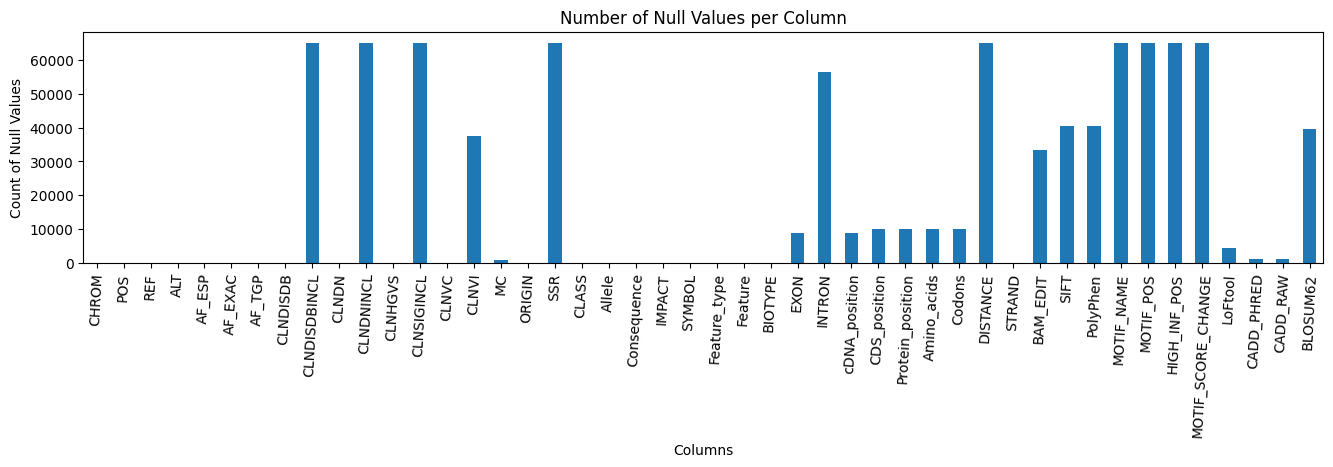

<Figure size 640x480 with 0 Axes>

In [7]:
null_counts = df.isnull().sum()

# Simple bar chart
plt.figure(figsize=(16, 3))
null_counts.plot(kind='bar')
plt.title('Number of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=87)  # Rotate column names for better visibility
plt.show()
plt.savefig('null_counts')


We can see from the graph that 10 columns definitely have to excluded due to their high missing values.

# 2. Data Cleaning

### The missing data matrix

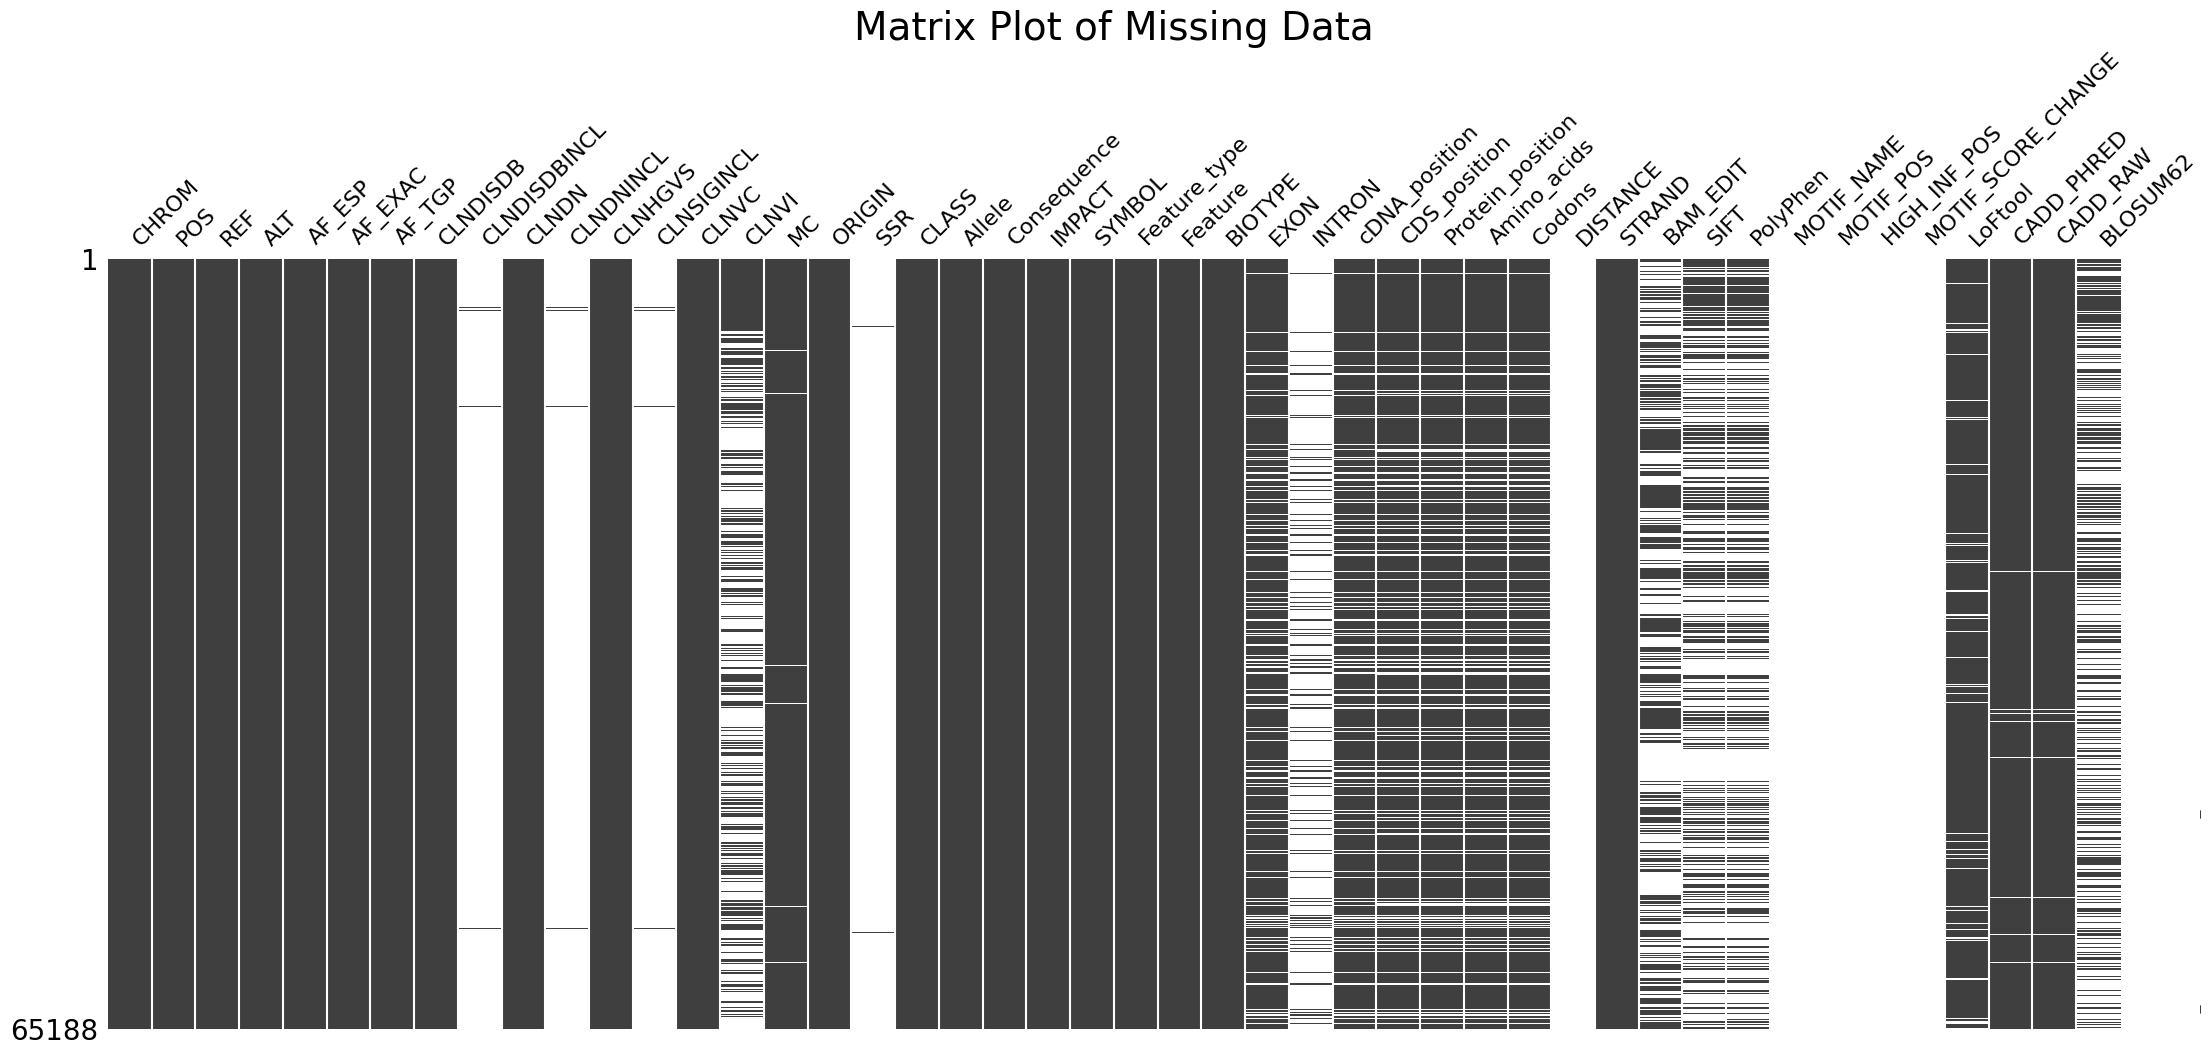

<Figure size 640x480 with 0 Axes>

In [8]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(
    df,
    figsize=(27, 10),       # Adjusting the figure size
    width_ratios=(10, 0)    # Adjusting the width of the side sparkline
)
plt.title('Matrix Plot of Missing Data', fontsize=28)
plt.show()
plt.savefig('missing_data_matrix')


Remove columns with more than 70 percent ofmissing data:

In [9]:
missing_threshold = 0.5 * len(df)
columns_to_drop = df.columns[df.isnull().sum() > missing_threshold]
df_cleaned_50 = df.drop(columns=columns_to_drop)


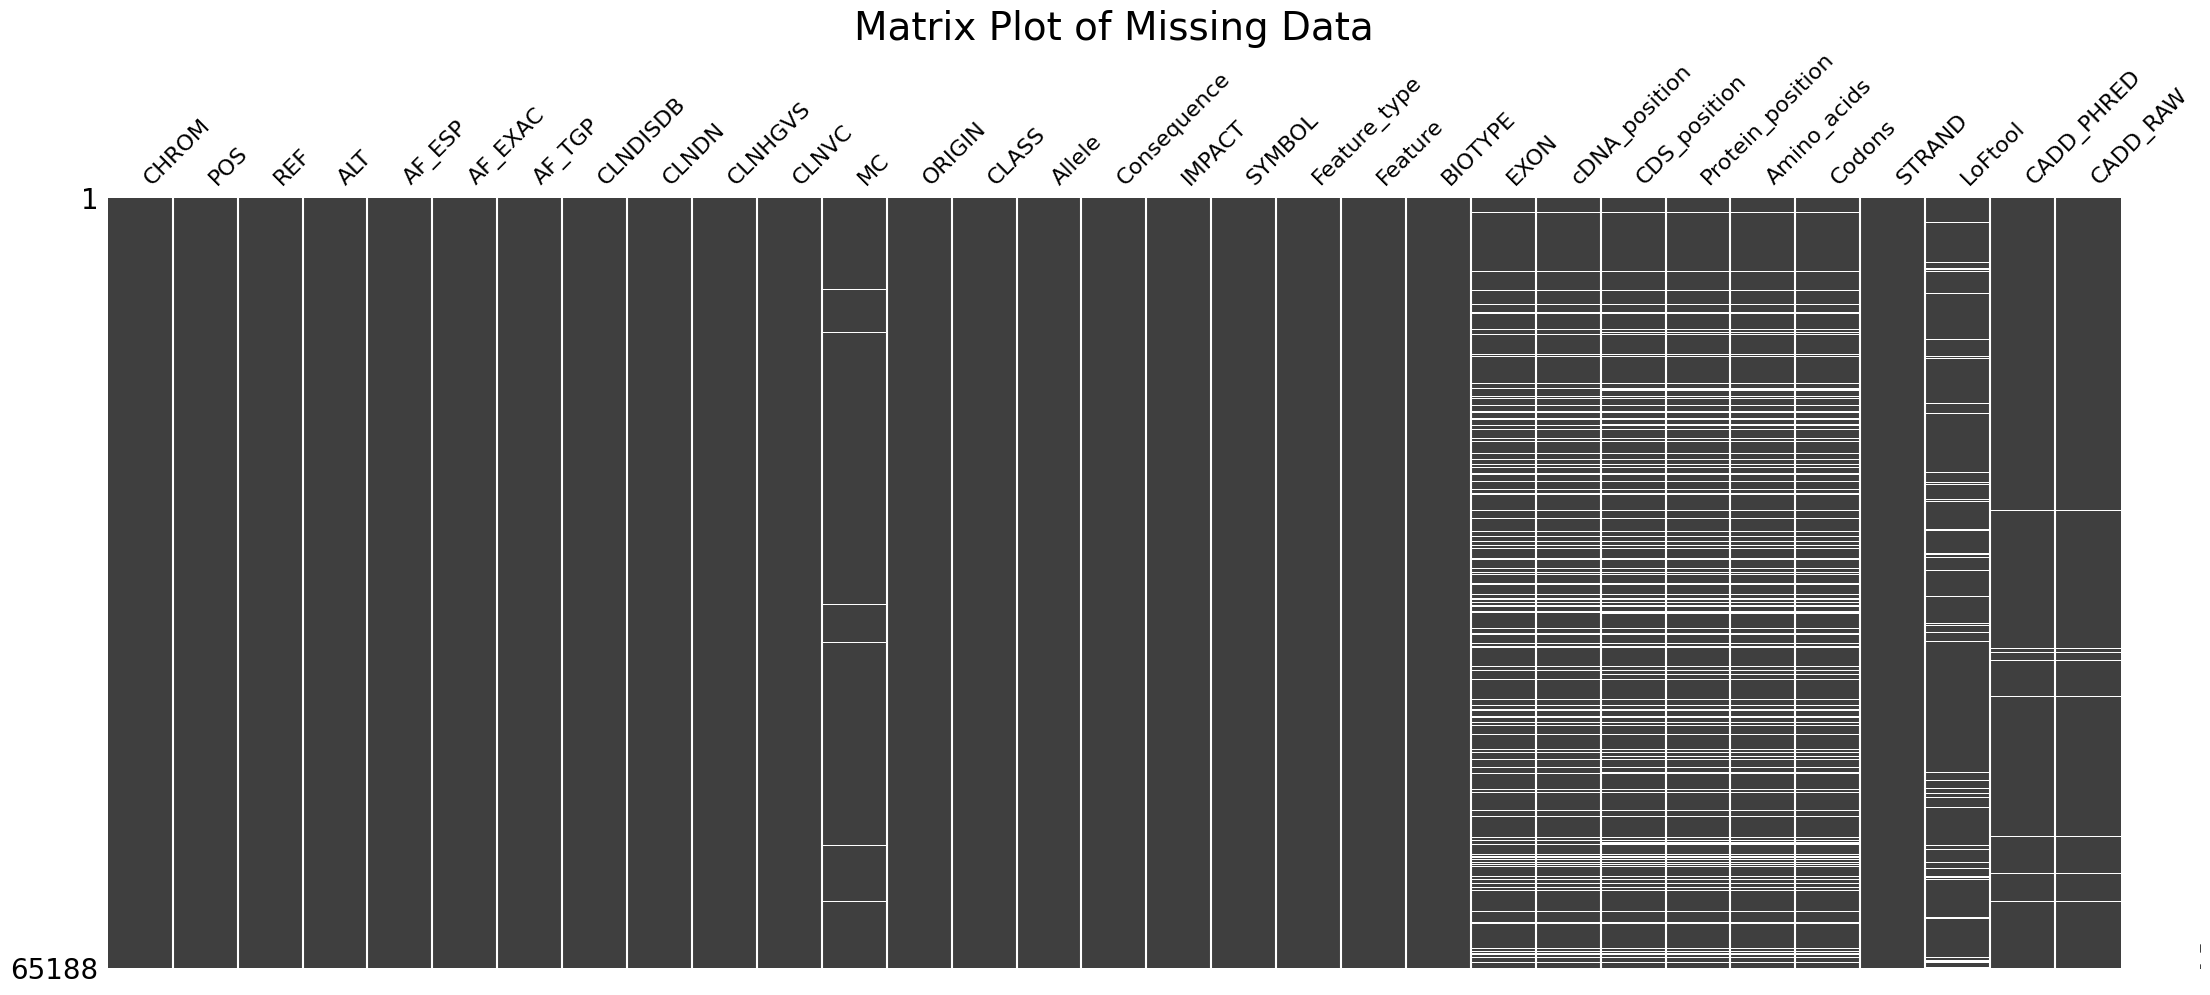

Dropped columns with excessive missing values: ['CLNDISDBINCL', 'CLNDNINCL', 'CLNSIGINCL', 'CLNVI', 'SSR', 'INTRON', 'DISTANCE', 'BAM_EDIT', 'SIFT', 'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE', 'BLOSUM62']


In [10]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(
    df_cleaned_50,
    figsize=(27, 10),       # Adjusting the figure size
    width_ratios=(10, 0)    # Adjusting the width of the side sparkline
)
plt.title('Matrix Plot of Missing Data', fontsize=28)
plt.show()
print(f"Dropped columns with excessive missing values: {list(columns_to_drop)}")


In [11]:
plt.savefig('missing_data_matrix_50')

<Figure size 640x480 with 0 Axes>

In [12]:
df_cleaned_50.dropna()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,...,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,STRAND,LoFtool,CADD_PHRED,CADD_RAW
6,1,3328358,T,C,0.0000,0.00000,0.0000,MedGen:CN169374,not_specified,NC_000001.10:g.3328358T>C,...,9/17,1858,1600,534,S/P,Tcg/Ccg,1.0,0.10100,0.172,-0.543433
7,1,3328659,C,T,0.1523,0.13103,0.1060,MedGen:CN169374,not_specified,NC_000001.10:g.3328659C>T,...,9/17,2159,1901,634,P/L,cCt/cTt,1.0,0.10100,23.000,3.424422
8,1,3347452,G,A,0.0000,0.00357,0.0030,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",Left_ventricular_noncompaction_8|not_specified...,NC_000001.10:g.3347452G>A,...,15/17,3562,3304,1102,V/M,Gtg/Atg,1.0,0.10100,11.360,1.126629
9,1,5925304,G,A,0.0045,0.00231,0.0058,"MedGen:C0687120,Orphanet:ORPHA655,SNOMED_CT:20...",Nephronophthisis|not_specified,NC_000001.10:g.5925304G>A,...,27/30,3942,3674,1225,T/M,aCg/aTg,-1.0,0.02100,22.100,2.969650
10,1,5926503,G,A,0.0019,0.00267,0.0010,"MedGen:C0687120,Orphanet:ORPHA655,SNOMED_CT:20...",Nephronophthisis|not_specified,NC_000001.10:g.5926503G>A,...,26/30,3842,3574,1192,R/W,Cgg/Tgg,-1.0,0.02100,26.100,5.430178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65182,X,154157565,C,T,0.0153,0.00473,0.0140,MedGen:CN169374|MedGen:CN239152,"not_specified|Hemophilia_A,_FVIII_Deficiency",NC_000023.10:g.154157565C>T,...,14/26,4671,4500,1500,P,ccG/ccA,-1.0,0.00158,11.440,1.142527
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",Hereditary_factor_VIII_deficiency_disease|not_...,NC_000023.10:g.154158201T>G,...,14/26,4035,3864,1288,S,tcA/tcC,-1.0,0.00158,0.105,-0.630908
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,"not_specified|Hemophilia_A,_FVIII_Deficiency",NC_000023.10:g.154159118C>T,...,14/26,3118,2947,983,V/I,Gta/Ata,-1.0,0.00158,0.002,-1.731470
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,"not_specified|Hemophilia_A,_FVIII_Deficiency",NC_000023.10:g.154194886C>T,...,8/26,1257,1086,362,A,gcG/gcA,-1.0,0.00158,12.850,1.412434


In [13]:
df_cleaned_50 = df_cleaned_50.dropna()


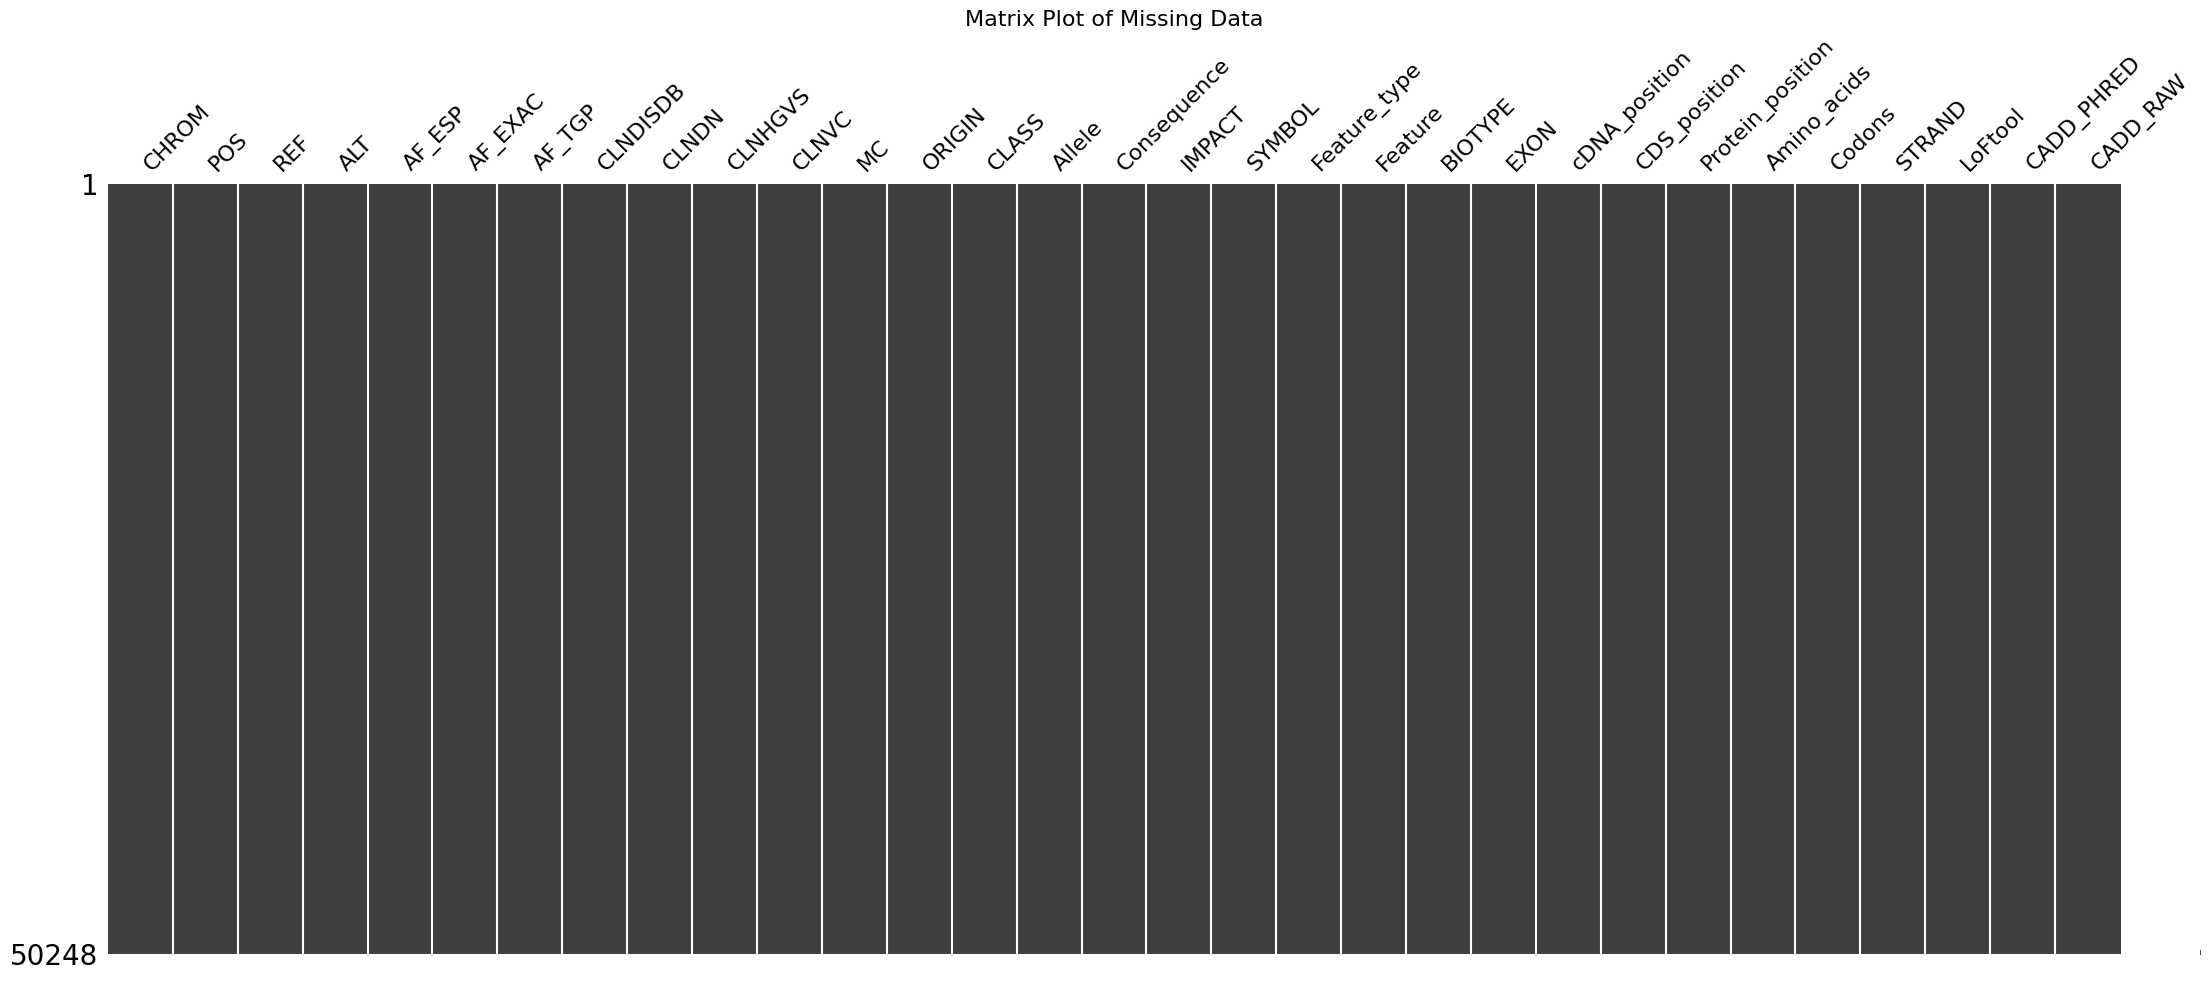

Dropped columns with excessive missing values: ['CLNDISDBINCL', 'CLNDNINCL', 'CLNSIGINCL', 'CLNVI', 'SSR', 'INTRON', 'DISTANCE', 'BAM_EDIT', 'SIFT', 'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE', 'BLOSUM62']


In [14]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(
    df_cleaned_50,
    figsize=(27, 10),       # Adjusting the figure size
    width_ratios=(10, 0)    # Adjusting the width of the side sparkline
)
plt.title('Matrix Plot of Missing Data', fontsize=16)
plt.show()
print(f"Dropped columns with excessive missing values: {list(columns_to_drop)}")


### Apply Label Encoding to each categorical column for modelling part


In [15]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['CHROM', 'REF', 'ALT', 'CLNDISDB', 'CLNDN', 'CLNHGVS', 'CLNVC',
                       'MC', 'Allele', 'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type',
                       'Feature', 'BIOTYPE', 'EXON', 'cDNA_position', 'CDS_position',
                       'Protein_position', 'Amino_acids', 'Codons', ]

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned_50[col] = le.fit_transform(df_cleaned_50[col].astype(str))  # Convert to string to handle NaNs



In [16]:
df_cleaned_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50248 entries, 6 to 65187
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             50248 non-null  int64  
 1   POS               50248 non-null  int64  
 2   REF               50248 non-null  int64  
 3   ALT               50248 non-null  int64  
 4   AF_ESP            50248 non-null  float64
 5   AF_EXAC           50248 non-null  float64
 6   AF_TGP            50248 non-null  float64
 7   CLNDISDB          50248 non-null  int64  
 8   CLNDN             50248 non-null  int64  
 9   CLNHGVS           50248 non-null  int64  
 10  CLNVC             50248 non-null  int64  
 11  MC                50248 non-null  int64  
 12  ORIGIN            50248 non-null  int64  
 13  CLASS             50248 non-null  int64  
 14  Allele            50248 non-null  int64  
 15  Consequence       50248 non-null  int64  
 16  IMPACT            50248 non-null  int64  
 17

In [17]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
65183,False
65184,False
65185,False
65186,False


In [69]:
df.to_csv('/content/clinvar_cleaned.csv', index=False)

# Download the CSV to your computer
from google.colab import files
files.download('/content/clinvar_cleaned.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Data exploration

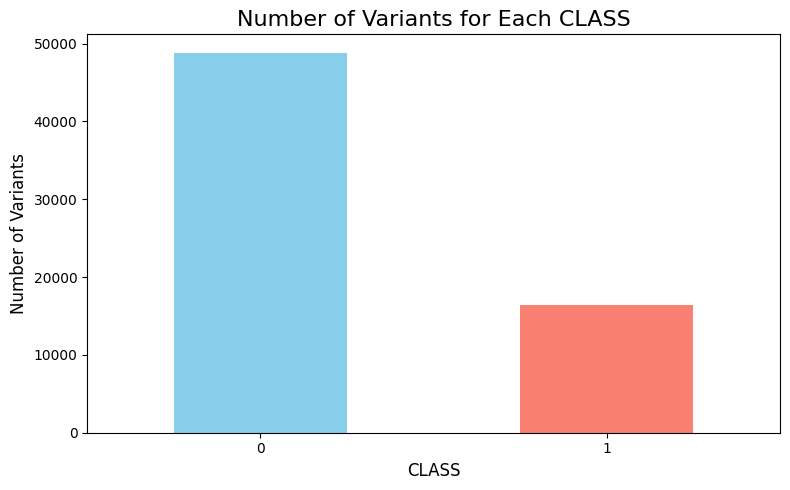

In [18]:
# Count the number of variants for each CLASS
class_counts = df['CLASS'].value_counts()

# Plot the counts as a bar graph using Matplotlib
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Number of Variants for Each CLASS', fontsize=16)
plt.xlabel('CLASS', fontsize=12)
plt.ylabel('Number of Variants', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The number of variants is higher for class 0 by around 3000.

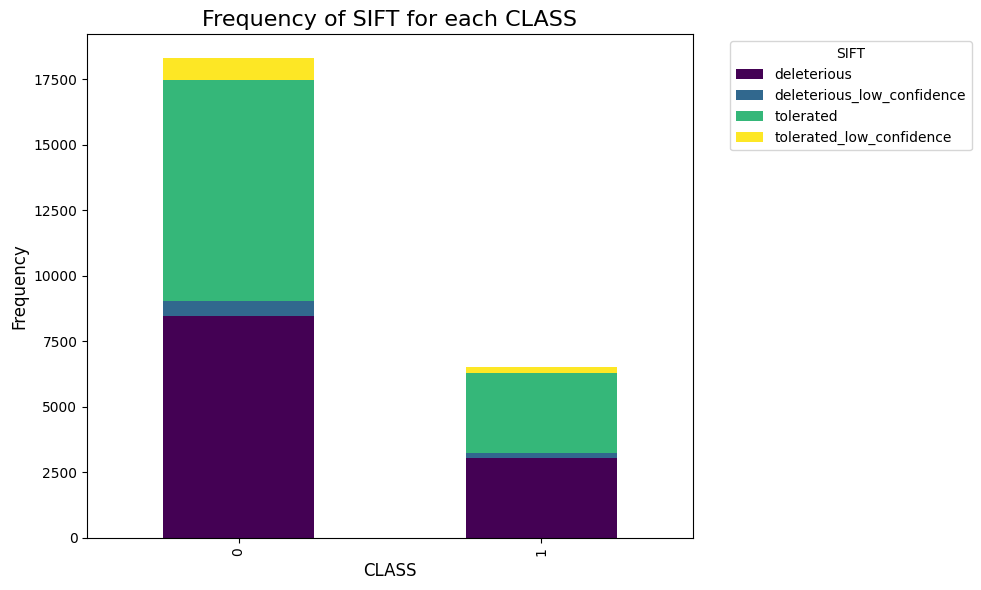

In [19]:
# Group by 'CLASS' and calculate frequency of 'SIFT'
sift_counts = df.groupby('CLASS')['SIFT'].value_counts().unstack()

# Plot the frequency of 'SIFT' for each 'CLASS'
sift_counts.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis')

plt.title('Frequency of SIFT for each CLASS', fontsize=16)
plt.xlabel('CLASS', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='SIFT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We can see that there is higher representation of class 1 (concordant classifications) in the dataset. Within each respective class, the proportions of SIFT are relatively the equal, i.e. there is no indication of deleterious or tolerated effects being more common neither in class 0, nor 1.

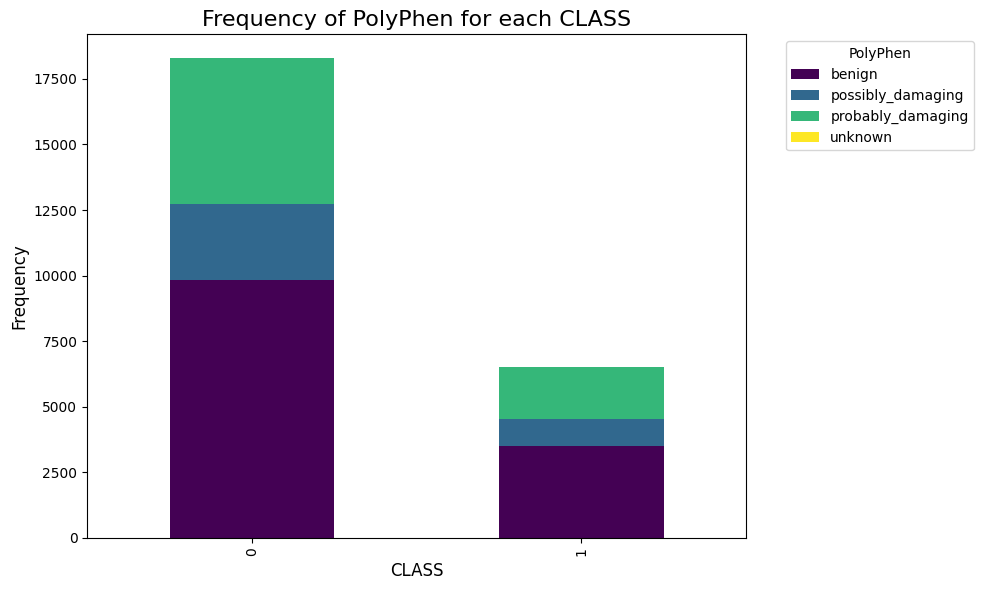

In [20]:
# Group by 'CLASS' and calculate frequency of 'PolyPhen'
sift_counts = df.groupby('CLASS')['PolyPhen'].value_counts().unstack()

# Plot the frequency of 'PolyPhen' for each 'CLASS'
sift_counts.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis')

plt.title('Frequency of PolyPhen for each CLASS', fontsize=16)
plt.xlabel('CLASS', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='PolyPhen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

When we compare PolyPhen scores for each class, "benign" stands out with the highest frequency for both.

In [21]:
# Calculate the frequency of each SYMBOL
symbol_counts = df['SYMBOL'].value_counts()

# Display the frequency distribution
print(symbol_counts.head(20))  # Display top 20 most common SYMBOLs
print(symbol_counts.describe())  # Summarize the distribution

SYMBOL
TTN        2765
BRCA2      1934
ATM        1909
APC        1228
BRCA1      1075
MSH6       1048
LDLR        905
PALB2       794
NF1         732
TSC2        640
BRIP1       627
PMS2        600
MSH2        596
POLE        571
CDH1        553
CHEK2       491
BARD1       490
SMARCA4     451
MYBPC3      441
RAD50       426
Name: count, dtype: int64
count    2328.000000
mean       27.994845
std       108.091662
min         1.000000
25%         3.000000
50%         7.000000
75%        19.250000
max      2765.000000
Name: count, dtype: float64


In [22]:
# Filter for SYMBOLs that occur 1000 times or more
symbols_to_keep = symbol_counts[symbol_counts >= 500].index

# Replace less frequent SYMBOLs with 'Others'
df['SYMBOL_FILTERED'] = df['SYMBOL'].apply(lambda x: x if x in symbols_to_keep else 'Others')
# Create filtered DataFrame excluding "Others"
filtered_df = df[df['SYMBOL_FILTERED'] != 'Others']
# Check the new distribution
print(df['SYMBOL_FILTERED'].value_counts())

SYMBOL_FILTERED
Others    49211
TTN        2765
BRCA2      1934
ATM        1909
APC        1228
BRCA1      1075
MSH6       1048
LDLR        905
PALB2       794
NF1         732
TSC2        640
BRIP1       627
PMS2        600
MSH2        596
POLE        571
CDH1        553
Name: count, dtype: int64


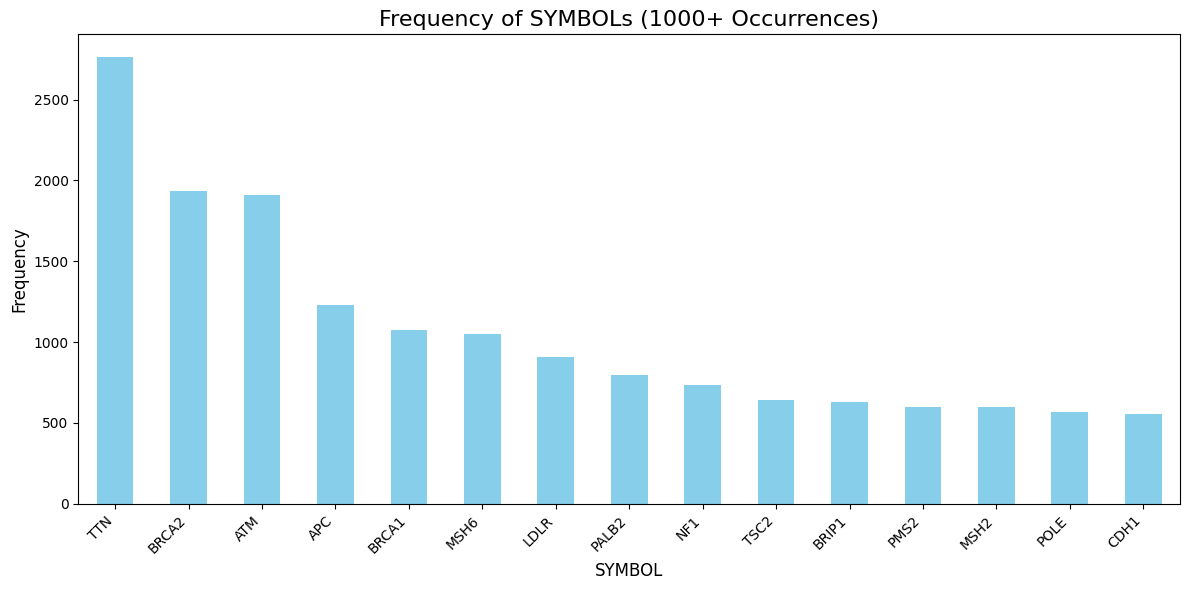

In [23]:
# Calculate the frequency of SYMBOL_FILTERED (excluding "Others")
symbol_frequencies = filtered_df['SYMBOL_FILTERED'].value_counts()

# Plot the general frequency of SYMBOL
plt.figure(figsize=(12, 6))
symbol_frequencies.plot(kind='bar', color='skyblue')

plt.title('Frequency of SYMBOLs (1000+ Occurrences)', fontsize=16)
plt.xlabel('SYMBOL', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

The distribution of the most common genes present in the dataset that are above the threshold of 1000 occurences. The functions of the genes as described by UniProt are as follows. The TTN gene is a "key component in the assembly and functioning of vertebrate striated muscles". BRCA2 is a breast cancer gene, "involved in double-strand break repair and/or homologous recombination". ATM is a "terine/threonine protein kinase which activates checkpoint signaling upon double strand breaks". APC - tumor suppressor gene. BRCA1 - linked to breast cancer, a "E3 ubiquitin-protein ligase". MSH6 is a "component of the post-replicative DNA mismatch repair system".

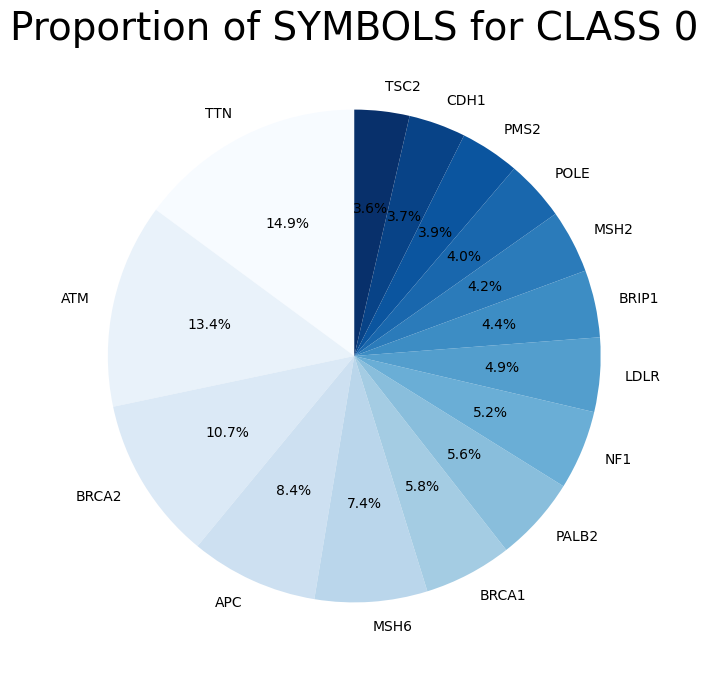

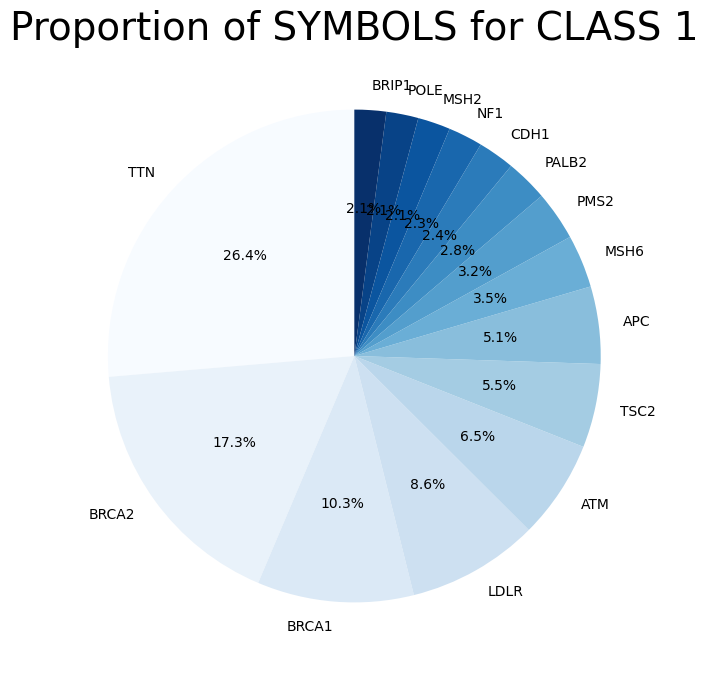

In [24]:
# Filter data for CLASS 0 and CLASS 1
class_0_data = filtered_df[filtered_df['CLASS'] == 0]['SYMBOL_FILTERED'].value_counts()
class_1_data = filtered_df[filtered_df['CLASS'] == 1]['SYMBOL_FILTERED'].value_counts()

# Plot pie chart for CLASS 0
plt.figure(figsize=(8, 8))
class_0_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Blues')
plt.title('Proportion of SYMBOLS for CLASS 0', fontsize=28)
plt.ylabel('')  # Remove y-axis label for clarity
plt.show()

# Plot pie chart for CLASS 1
plt.figure(figsize=(8, 8))
class_1_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Blues')
plt.title('Proportion of SYMBOLS for CLASS 1', fontsize=28)
plt.ylabel('')  # Remove y-axis label for clarity
plt.show()


Class 0 has TTN, ATM, BRCA2 as the most frequent genes in this dataset. Class 1 variants mostly have TTN, BRCA2 and BRCA1.

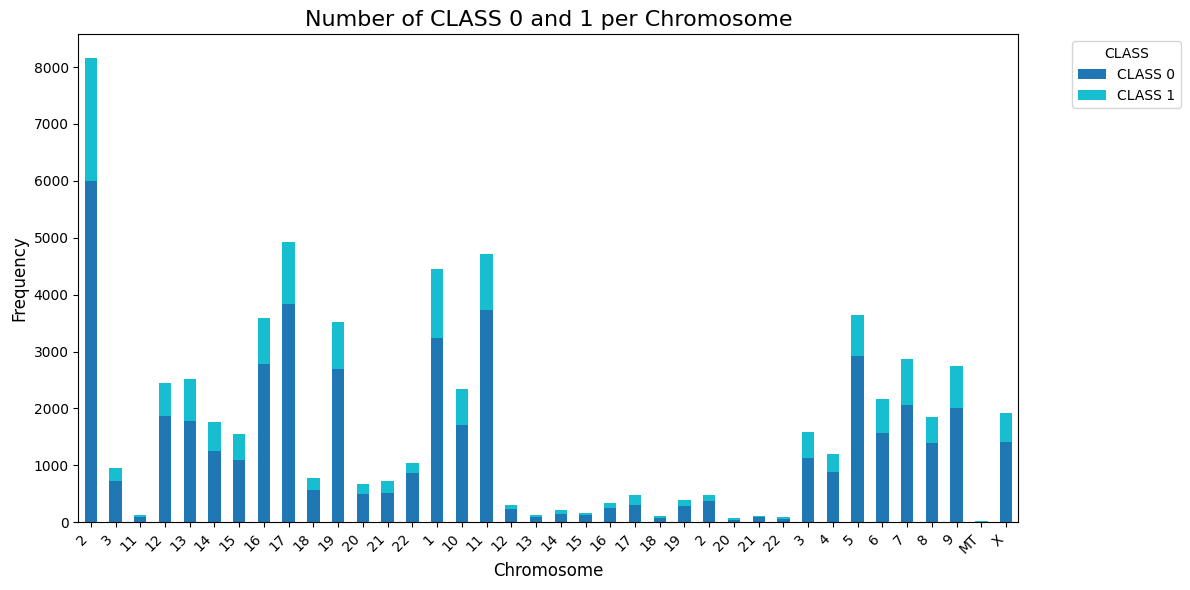

In [25]:
# Count occurrences of CLASS by Chromosome
chromosome_class_counts = df.groupby(['CHROM', 'CLASS']).size().unstack(fill_value=0)

# Plot the stacked bar chart
chromosome_class_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

plt.title('Number of CLASS 0 and 1 per Chromosome', fontsize=16)
plt.xlabel('Chromosome', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='CLASS', labels=['CLASS 0', 'CLASS 1'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Chromosome 2 has by far the most variants in the dataset, the next ones being chromosome 17, 11 and 5. Others have lower variant frequency. Additionally, it can be said that for all chromosomes, Class 0 is the prevalent classification.

In [26]:
#Combine 'not_specified' and 'not_specified|not_provided'
df['CLNDN'] = df['CLNDN'].replace({'not_specified|not_provided': 'not_specified'})
# Count occurrences of diseases by CLASS
disease_counts = df.groupby(['CLNDN', 'CLASS']).size().unstack(fill_value=0)

# Sort by total occurrences
disease_counts['TOTAL'] = disease_counts.sum(axis=1)
disease_counts = disease_counts.sort_values('TOTAL', ascending=False).drop(columns='TOTAL')

# Show the top 10 diseases
print(disease_counts.head(10))

CLASS                                                  0     1
CLNDN                                                         
not_specified                                       5086  1656
Hereditary_cancer-predisposing_syndrome|not_spe...  1599   125
Hereditary_cancer-predisposing_syndrome             1108    31
Limb-girdle_muscular_dystrophy,_type_2J|Dilated...   702   211
Familial_hypercholesterolemia                        526   206
Ataxia-telangiectasia_syndrome|Hereditary_cance...   580    28
Hereditary_cancer-predisposing_syndrome|Familia...   531    30
Ciliary_dyskinesia|not_specified                     359   167
Hereditary_cancer-predisposing_syndrome|Neurofi...   476    37
Ataxia-telangiectasia_syndrome|Hereditary_cance...   404    65


We have combined variants denoted as "not_specified" and "not_specified|not_provided" for ease of depiction.

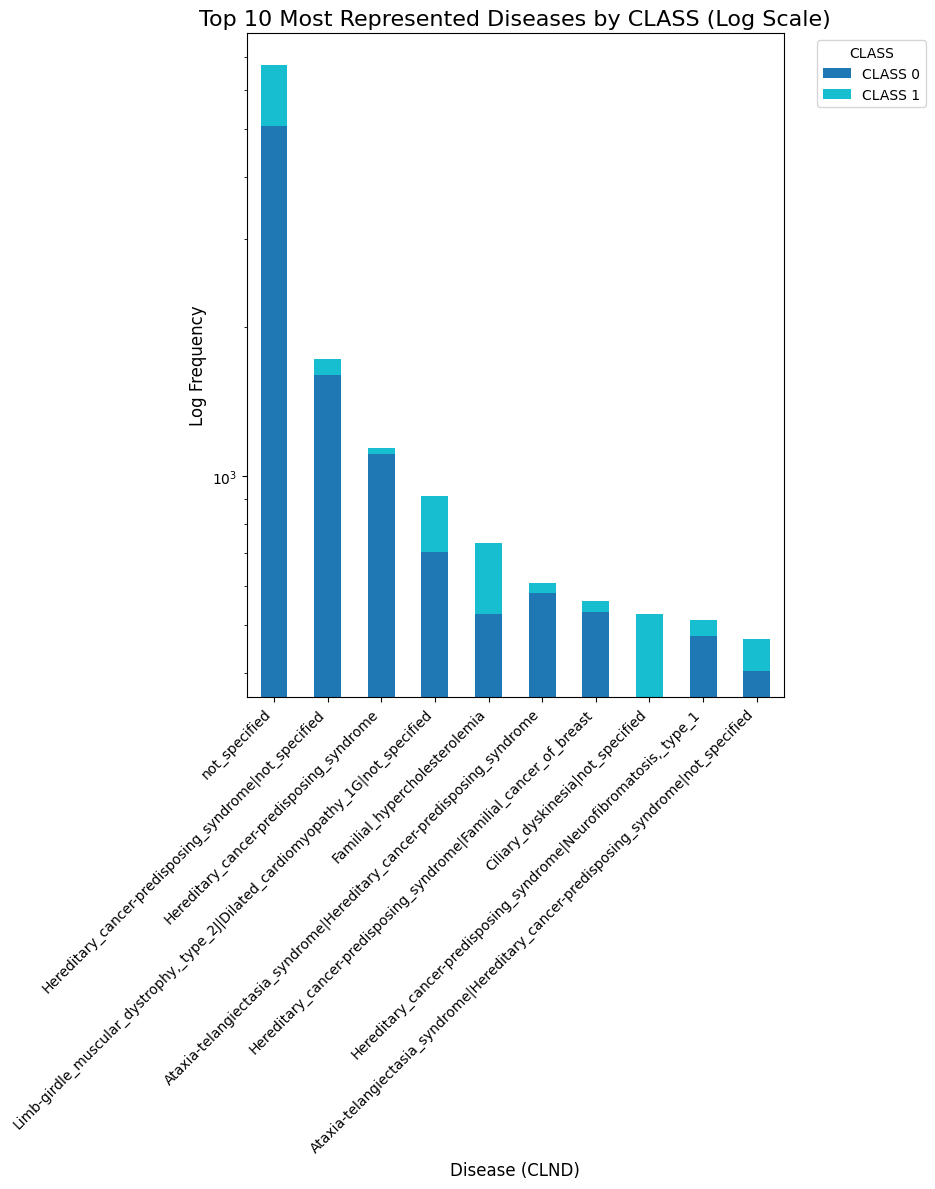

In [27]:
# Select top 10 diseases
top_diseases = disease_counts.head(10)

# Plot with a logarithmic y-axis
top_diseases.plot(kind='bar', stacked=True, figsize=(9, 12), colormap='tab10', log=True)
plt.title('Top 10 Most Represented Diseases by CLASS (Log Scale)', fontsize=16)
plt.xlabel('Disease (CLND)', fontsize=12)
plt.ylabel('Log Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(title='CLASS', labels=['CLASS 0', 'CLASS 1'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Many laboratories in this dataset have not given information on disease association of the variants.

<ipython-input-28-53e5c4a82854>:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1920x1440 with 0 Axes>

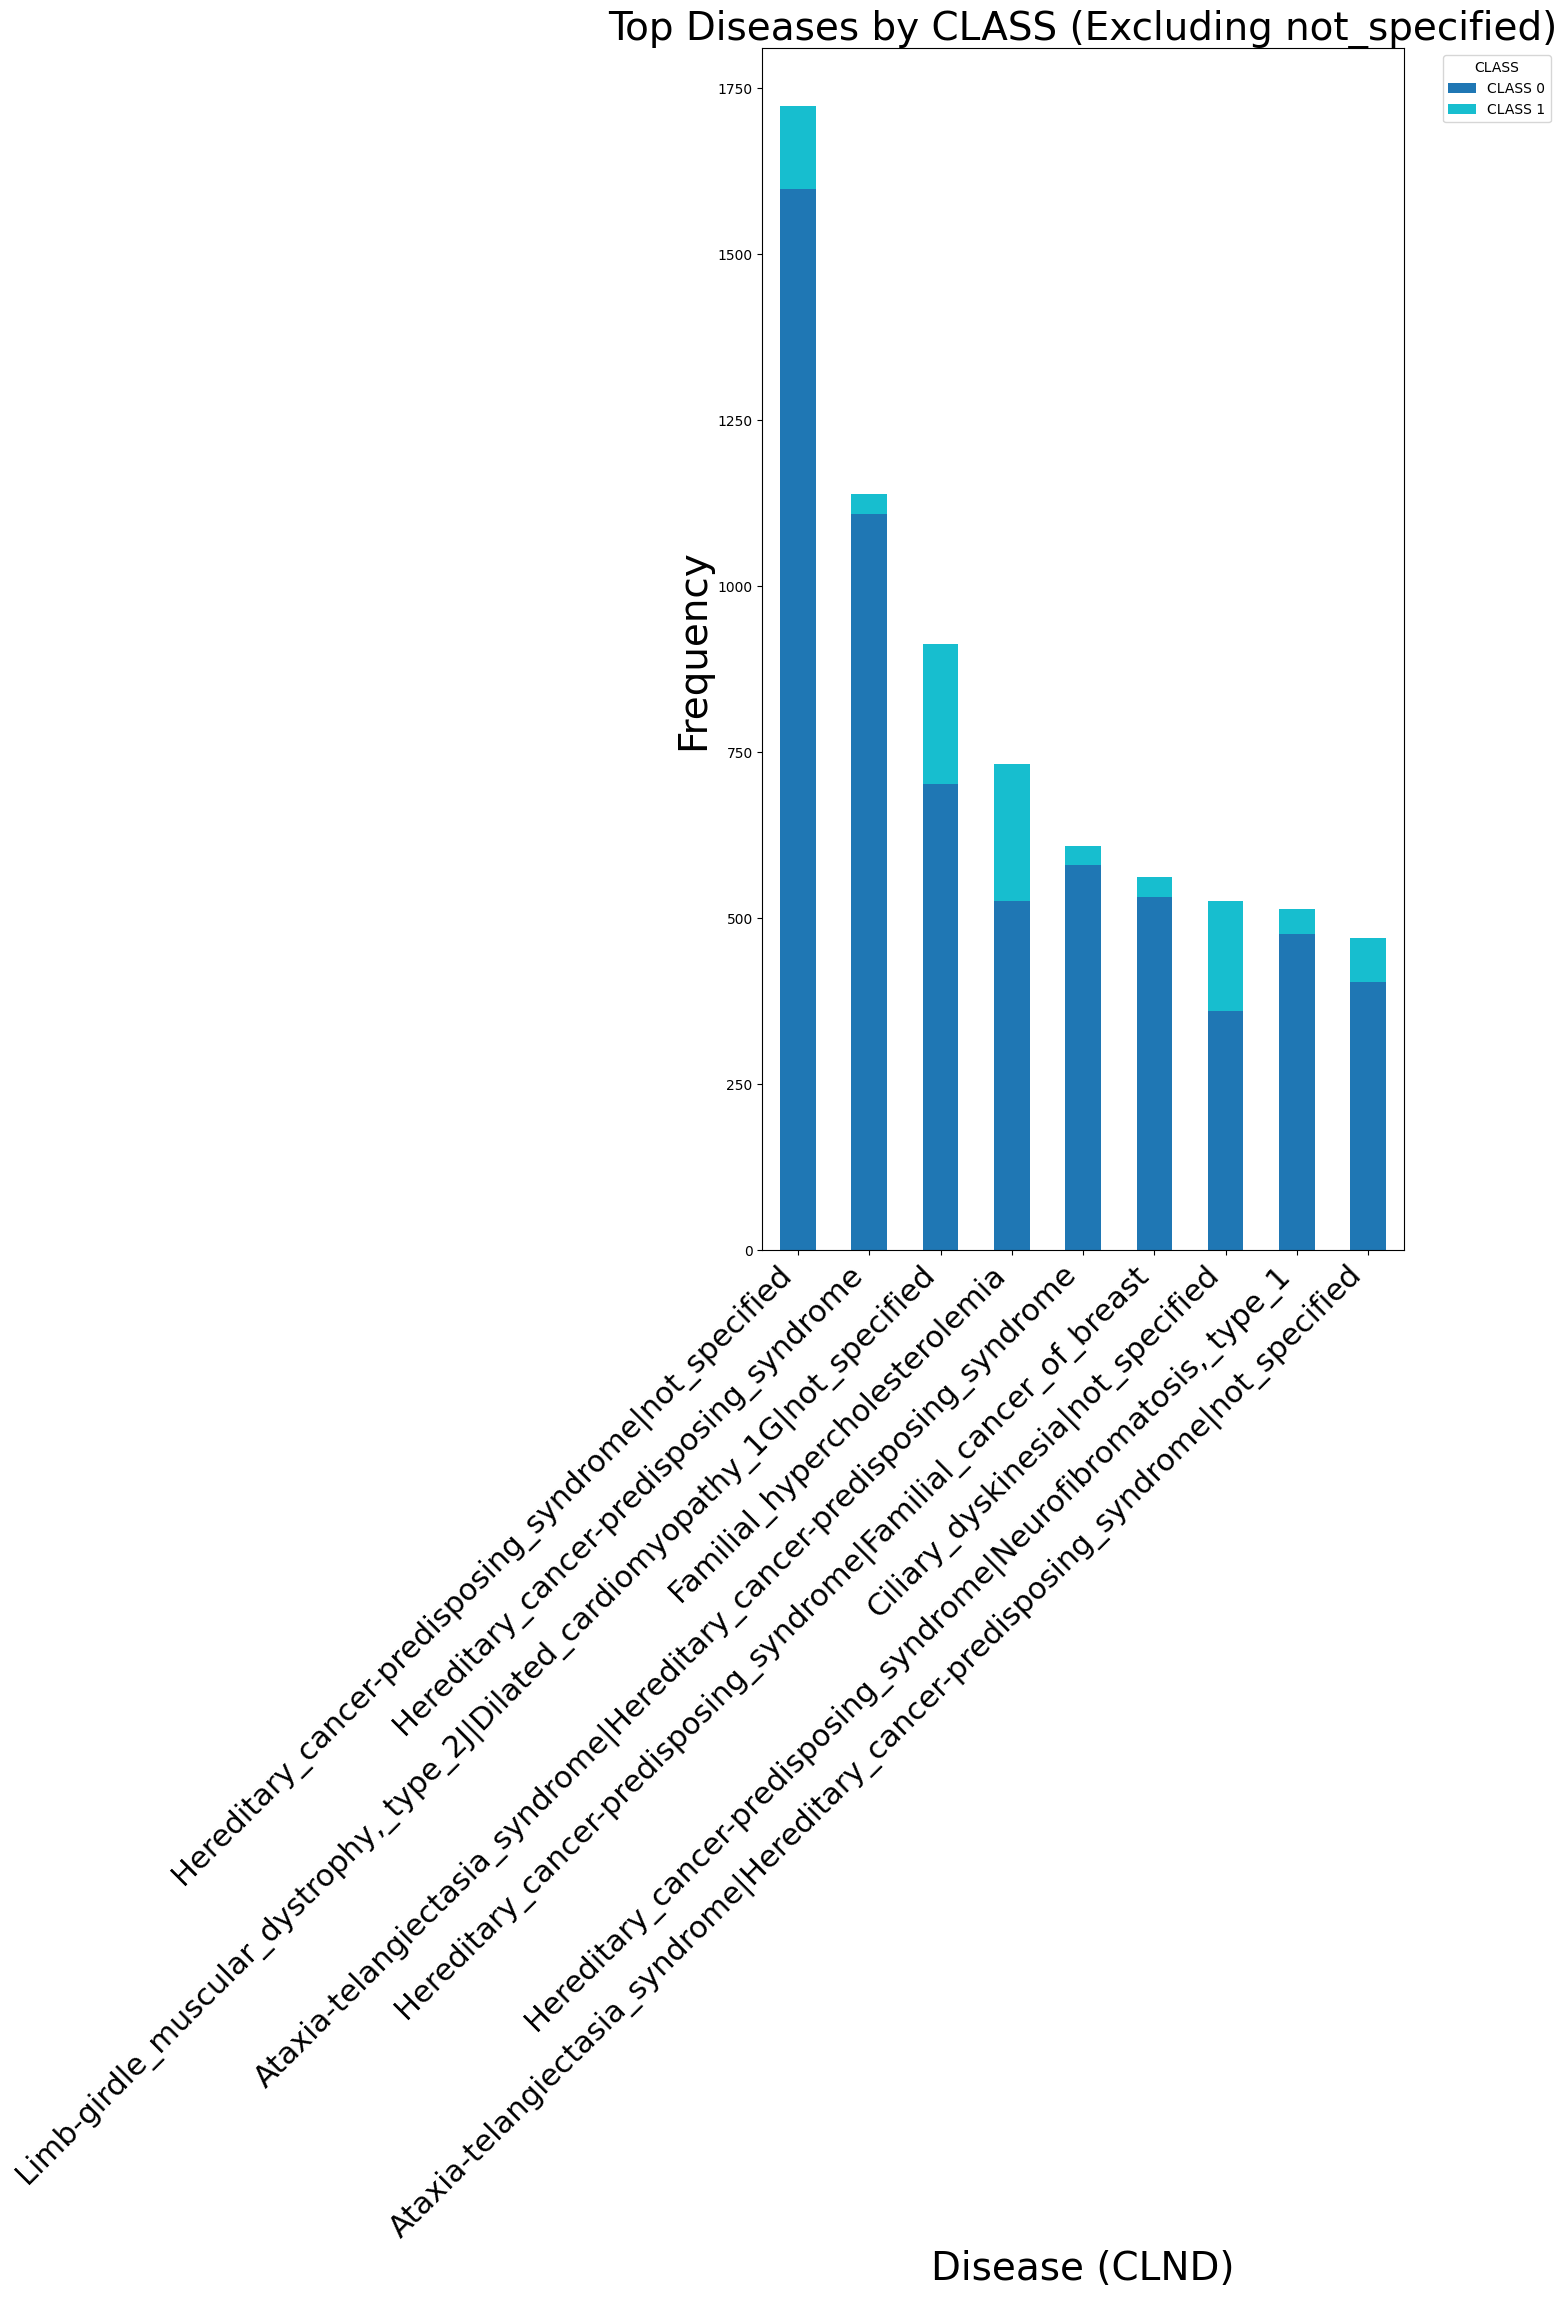

In [28]:
# Exclude 'not_specified' and replot
filtered_diseases = top_diseases.drop('not_specified', errors='ignore')

plt.figure(dpi=300)
# Plot the filtered data
filtered_diseases.plot(kind='bar', stacked=True, figsize=(33.1/4, 46.8/3), colormap='tab10')

plt.title('Top Diseases by CLASS (Excluding not_specified)', fontsize=28)
plt.xlabel('Disease (CLND)', fontsize=28)
plt.ylabel('Frequency', fontsize=28)
plt.xticks(rotation=45, ha='right',fontsize=22)
plt.legend(title='CLASS', labels=['CLASS 0', 'CLASS 1'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We have removed the cases where the disease is not specified to highlight the diseases most commonly associated with the variants in the dataset. The most commonly represented disease is hereditary cancer predisposing syndrome.
❓**QUESTION: what do we do about those "not specified" parts? what do they mean, should we disregard them and instead combine the bars where the disease name is the same?**

# 4. Machine learning

### How to deal with class imbalance? Method 1. using SMOTE


In [29]:
df_cleaned_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50248 entries, 6 to 65187
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             50248 non-null  int64  
 1   POS               50248 non-null  int64  
 2   REF               50248 non-null  int64  
 3   ALT               50248 non-null  int64  
 4   AF_ESP            50248 non-null  float64
 5   AF_EXAC           50248 non-null  float64
 6   AF_TGP            50248 non-null  float64
 7   CLNDISDB          50248 non-null  int64  
 8   CLNDN             50248 non-null  int64  
 9   CLNHGVS           50248 non-null  int64  
 10  CLNVC             50248 non-null  int64  
 11  MC                50248 non-null  int64  
 12  ORIGIN            50248 non-null  int64  
 13  CLASS             50248 non-null  int64  
 14  Allele            50248 non-null  int64  
 15  Consequence       50248 non-null  int64  
 16  IMPACT            50248 non-null  int64  
 17

In [ ]:
class_counts = df_cleaned_50['CLASS'].value_counts()
print("Class Distribution:\n", class_counts)


Class Distribution:
 CLASS
0    37742
1    12506
Name: count, dtype: int64


<ipython-input-30-1acbf33cc39e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


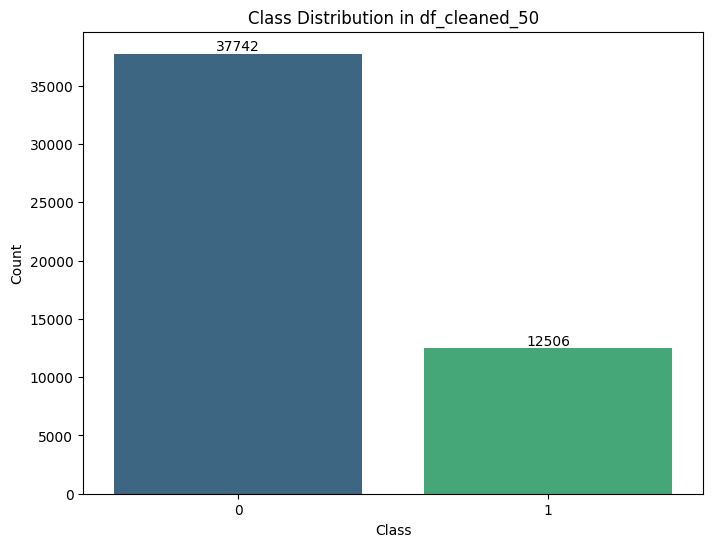

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df_cleaned_50['CLASS'].value_counts()

# Visualize class counts
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in df_cleaned_50')

# Display counts on top of each bar
for index, value in enumerate(class_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


<ipython-input-31-b577dfa545f2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


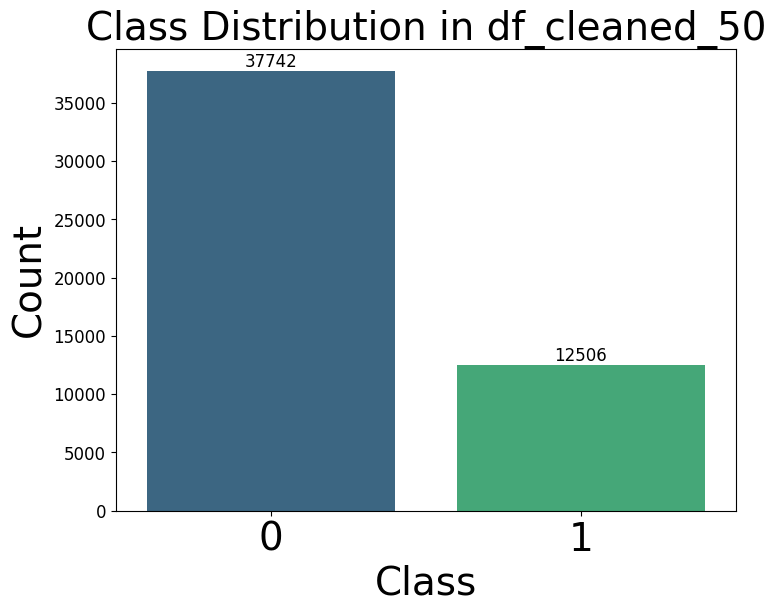

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df_cleaned_50['CLASS'].value_counts()

# Visualize class counts
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Set font size for axis labels and title
plt.xlabel('Class', fontsize=28)  # Increase font size of x-axis label
plt.ylabel('Count', fontsize=28)  # Increase font size of y-axis label
plt.title('Class Distribution in df_cleaned_50', fontsize=28)  # Increase font size of title

# Display counts on top of each bar with larger font
for index, value in enumerate(class_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)  # Increase font size of text

plt.xticks(fontsize=28)  # Set font size for x-axis tick labels
plt.yticks(fontsize=12)  # Set font size for y-axis tick labels
plt.show()


<ipython-input-32-fdfe749aea95>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


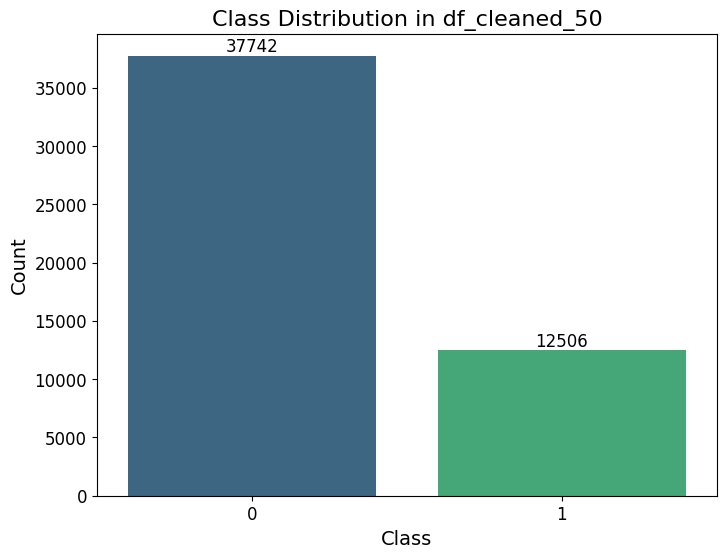

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df_cleaned_50['CLASS'].value_counts()

# Visualize class counts
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Set font size for axis labels and title
plt.xlabel('Class', fontsize=14)  # Increase font size of x-axis label
plt.ylabel('Count', fontsize=14)  # Increase font size of y-axis label
plt.title('Class Distribution in df_cleaned_50', fontsize=16)  # Increase font size of title

# Display counts on top of each bar with larger font
for index, value in enumerate(class_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)  # Increase font size of text

plt.xticks(fontsize=12)  # Set font size for x-axis tick labels
plt.yticks(fontsize=12)  # Set font size for y-axis tick labels
plt.show()


In [33]:
pip install imbalanced-learn

In [34]:
!pip install -U imbalanced-learn


In [35]:
# Define features and target
X = df_cleaned_50.drop('CLASS', axis=1)  # Drop the CLASS column (assuming it is the target)
y = df_cleaned_50['CLASS']  # Target variable (class: conflicting or not)

print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")


Shape of X: (50248, 30), Shape of y: (50248,)


In [36]:
from imblearn.over_sampling import SMOTE


In [37]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Use 'mean', 'median', or 'most_frequent' based on your data
X_imputed = imputer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Check the resampled class distribution
print("Resampled Class Distribution:\n", pd.Series(y_resampled).value_counts())


Resampled Class Distribution:
 CLASS
0    37742
1    37742
Name: count, dtype: int64


<ipython-input-38-60e7c2bcddcf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_after_resampling.index, y=class_counts_after_resampling.values, palette='viridis')


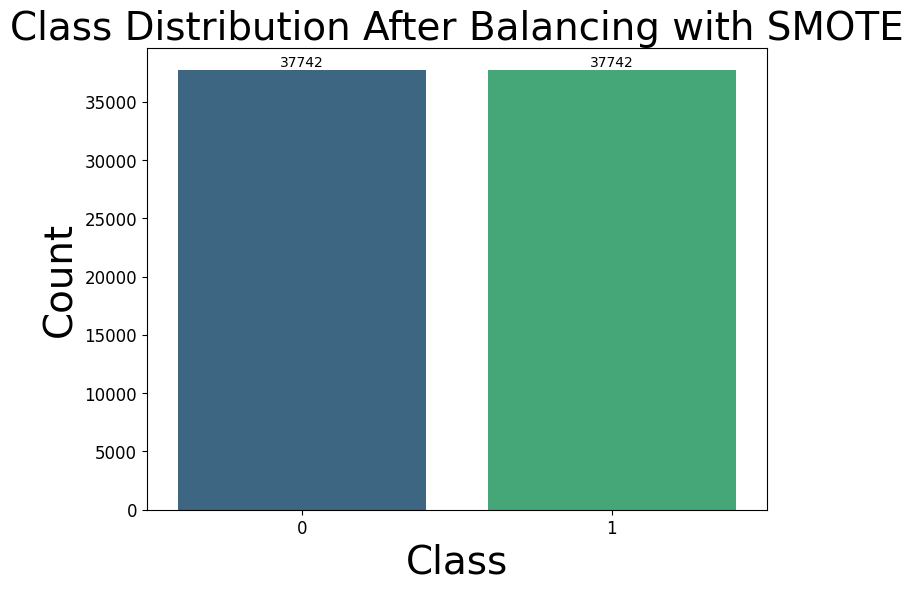

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count the occurrences of each class after resampling
class_counts_after_resampling = pd.Series(y_resampled).value_counts()

# Visualize class counts after resampling
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts_after_resampling.index, y=class_counts_after_resampling.values, palette='viridis')
# Set font size for axis labels and title
plt.xlabel('Class', fontsize=28)  # Increase font size of x-axis label
plt.ylabel('Count', fontsize=28)  # Increase font size of y-axis label

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After Balancing with SMOTE', fontsize=28)

# Display counts on top of each bar
for index, value in enumerate(class_counts_after_resampling.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.xticks(fontsize=12)  # Set font size for x-axis tick labels
plt.yticks(fontsize=12)  # Set font size for y-axis tick lab
plt.show()


In [52]:

import pandas as pd

# Check class distribution
class_counts = df_cleaned_50['CLASS'].value_counts()
print("Original Class Distribution:\n", class_counts)

# Separate the majority and minority classes
majority_class = df_cleaned_50[df_cleaned_50['CLASS'] == 0]  # Assuming 0 is the majority class
minority_class = df_cleaned_50[df_cleaned_50['CLASS'] == 1]  # Assuming 1 is the minority class

# Randomly undersample the majority class to match the minority class size
undersampled_majority_class = majority_class.sample(n=len(minority_class), random_state=42)

# Combine undersampled majority class with minority class
balanced_data = pd.concat([undersampled_majority_class, minority_class], axis=0)

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
balanced_class_counts = balanced_data['CLASS'].value_counts()
print("Balanced Class Distribution:\n", balanced_class_counts)




Original Class Distribution:
 CLASS
0    37742
1    12506
Name: count, dtype: int64
Balanced Class Distribution:
 CLASS
0    12506
1    12506
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### TRAIN VS TEST DATASET

In [53]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = balanced_data.drop('CLASS', axis=1)  # Features
y = balanced_data['CLASS']  # Target

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print shapes of training and testing sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (17508, 30), y_train shape: (17508,)
X_test shape: (7504, 30), y_test shape: (7504,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25012 entries, 0 to 25011
Series name: CLASS
Non-Null Count  Dtype
--------------  -----
25012 non-null  int64
dtypes: int64(1)
memory usage: 195.5 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
df_cleaned_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50248 entries, 6 to 65187
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             50248 non-null  int64  
 1   POS               50248 non-null  int64  
 2   REF               50248 non-null  int64  
 3   ALT               50248 non-null  int64  
 4   AF_ESP            50248 non-null  float64
 5   AF_EXAC           50248 non-null  float64
 6   AF_TGP            50248 non-null  float64
 7   CLNDISDB          50248 non-null  int64  
 8   CLNDN             50248 non-null  int64  
 9   CLNHGVS           50248 non-null  int64  
 10  CLNVC             50248 non-null  int64  
 11  MC                50248 non-null  int64  
 12  ORIGIN            50248 non-null  int64  
 13  CLASS             50248 non-null  int64  
 14  Allele            50248 non-null  int64  
 15  Consequence       50248 non-null  int64  
 16  IMPACT            50248 non-null  int64  
 17

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25012 entries, 0 to 25011
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             25012 non-null  int64  
 1   POS               25012 non-null  int64  
 2   REF               25012 non-null  int64  
 3   ALT               25012 non-null  int64  
 4   AF_ESP            25012 non-null  float64
 5   AF_EXAC           25012 non-null  float64
 6   AF_TGP            25012 non-null  float64
 7   CLNDISDB          25012 non-null  int64  
 8   CLNDN             25012 non-null  int64  
 9   CLNHGVS           25012 non-null  int64  
 10  CLNVC             25012 non-null  int64  
 11  MC                25012 non-null  int64  
 12  ORIGIN            25012 non-null  int64  
 13  CLASS             25012 non-null  int64  
 14  Allele            25012 non-null  int64  
 15  Consequence       25012 non-null  int64  
 16  IMPACT            25012 non-null  int64 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Import libraries for the ML Modelling

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Define a Function to Evaluate Models

In [44]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


### Initialize and Evaluate Models

In [58]:
# Initialize models
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Evaluate each model
for model in [logistic_regression, random_forest, svm, gradient_boosting, decision_tree]:
    evaluate_model(model, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.5231
Precision: 0.5236
Recall: 0.5107
F1 Score: 0.5171

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      3752
           1       0.52      0.51      0.52      3752

    accuracy                           0.52      7504
   macro avg       0.52      0.52      0.52      7504
weighted avg       0.52      0.52      0.52      7504

--------------------------------------------------
Model: RandomForestClassifier
Accuracy: 0.7247
Precision: 0.7057
Recall: 0.7708
F1 Score: 0.7368

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      3752
           1       0.71      0.77      0.74      3752

    accuracy                           0.72      7504
   macro avg       0.73      0.72      0.72      7504
weighted avg       0.73      0.72      0.72      7504

--------------------------------------------------
Model:

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors to see if performance improves

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the KNN model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print('--------------------------------------------------')
print(f'Model: K-Nearest Neighbors (K={knn.n_neighbors})')
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}\n')
print('Classification Report:\n', classification_report(y_test, y_pred_knn))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--------------------------------------------------
Model: K-Nearest Neighbors (K=5)
Accuracy: 0.5741
Precision: 0.5741
Recall: 0.5741
F1 Score: 0.5741

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.56      0.57      3752
           1       0.57      0.58      0.58      3752

    accuracy                           0.57      7504
   macro avg       0.57      0.57      0.57      7504
weighted avg       0.57      0.57      0.57      7504



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC Scores for each model:
Logistic Regression: AUC = 0.5251
Random Forest: AUC = 0.7991
SVC: AUC = 0.5300
Gradient Boosting: AUC = 0.7714
Decision Tree: AUC = 0.6478
KNN: AUC = 0.6008


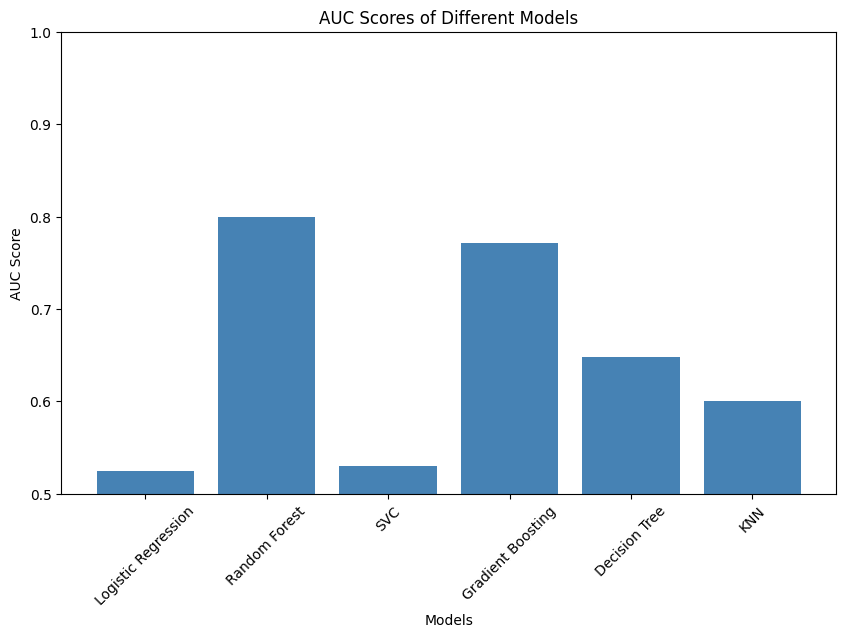

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dictionary to store AUC scores for each model
model_auc_scores = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_proba_log = log_reg.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
auc_log = roc_auc_score(y_test, y_proba_log)
model_auc_scores['Logistic Regression'] = auc_log

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_proba_rf)
model_auc_scores['Random Forest'] = auc_rf

# Support Vector Classifier (SVC)
from sklearn.svm import SVC
svc = SVC(probability=True, random_state=42)  # Enable probability=True for AUC calculation
svc.fit(X_train, y_train)
y_proba_svc = svc.predict_proba(X_test)[:, 1]
auc_svc = roc_auc_score(y_test, y_proba_svc)
model_auc_scores['SVC'] = auc_svc

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_proba_gbc = gbc.predict_proba(X_test)[:, 1]
auc_gbc = roc_auc_score(y_test, y_proba_gbc)
model_auc_scores['Gradient Boosting'] = auc_gbc

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_proba_dt = dt.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_proba_dt)
model_auc_scores['Decision Tree'] = auc_dt

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_proba_knn = knn.predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(y_test, y_proba_knn)
model_auc_scores['KNN'] = auc_knn

# Print AUC Scores
print("AUC Scores for each model:")
for model_name, auc_score in model_auc_scores.items():
    print(f"{model_name}: AUC = {auc_score:.4f}")

# Bar Plot for AUC Comparison
plt.figure(figsize=(10, 6))
plt.bar(model_auc_scores.keys(), model_auc_scores.values(), color='steelblue')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('AUC Scores of Different Models')
plt.xticks(rotation=45)
plt.ylim(0.5, 1)  # Assuming AUCs are between 0.5 and 1
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-61-b52deb9bc032>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_auc_scores.keys()),


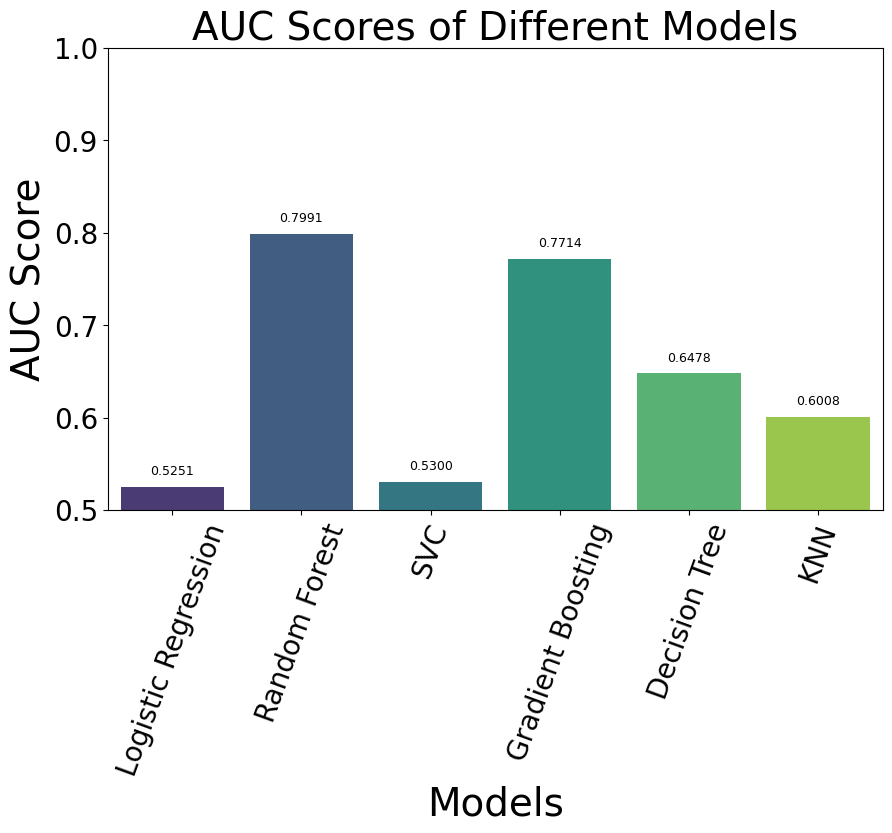

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot for AUC Comparison
plt.figure(figsize=(10, 6))

# Use seaborn to create the barplot with the same 'viridis' palette
sns.barplot(x=list(model_auc_scores.keys()),
            y=list(model_auc_scores.values()),
            palette='viridis')

plt.xlabel('Models', fontsize=28)
plt.ylabel('AUC Score', fontsize=28)
plt.title('AUC Scores of Different Models', fontsize=28)

# Rotate the model names for better visibility
plt.xticks(rotation=70)

# Set the y-limit to ensure the chart is readable
plt.ylim(0.5, 1)  # Assuming AUCs are between 0.5 and 1

# Display AUC score on top of each bar
for index, value in enumerate(model_auc_scores.values()):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(fontsize=20)  # Set font size for x-axis tick labels
plt.yticks(fontsize=20)  # Set font size for y-axis tick lab

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      3698
           1       0.34      0.30      0.32      1229

    accuracy                           0.68      4927
   macro avg       0.56      0.55      0.55      4927
weighted avg       0.67      0.68      0.67      4927

Confusion Matrix:
 [[2980  718]
 [ 862  367]]
Accuracy Score: 0.6793180434341384


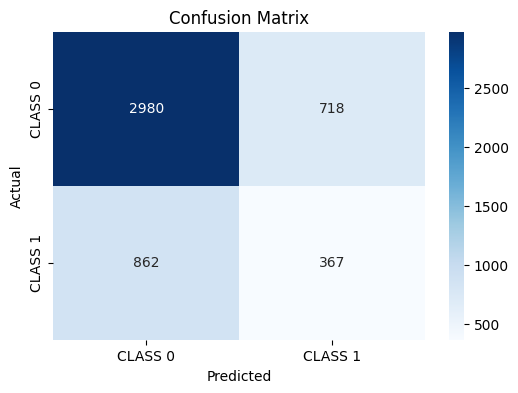

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features for prediction
features = ['SIFT', 'PolyPhen', 'CADD_PHRED', 'AF_ESP', 'AF_EXAC', 'AF_TGP']
target = 'CLASS'

# Drop rows with missing values in the selected columns
df_ml = df[features + [target]].dropna()

# Encode categorical features (if any, e.g., SIFT or PolyPhen) as numeric
df_ml = pd.get_dummies(df_ml, columns=['SIFT', 'PolyPhen'], drop_first=True)

# Step 2: Split data into train and test sets
X = df_ml.drop(columns=[target])
y = df_ml[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = rf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Step 5: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['CLASS 0', 'CLASS 1'], yticklabels=['CLASS 0', 'CLASS 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 5. Frequent Pattern Mining

In this section, we identify patterns between **SYMBOL (genes)** and **CLASS (classification of variants)**. The goal is to detect which SYMBOLs (genes) frequently co-occur with CLASS 0 (conflicting) or CLASS 1 (concordant).

To achieve this, we will:
1. **Encode SYMBOL and CLASS as binary columns** to prepare the data for frequent pattern mining.
2. **Apply the Apriori algorithm** to detect frequent itemsets.
3. **Generate association rules** to see how the presence of a SYMBOL affects the classification of the variant.

This analysis will help us understand which genes are most associated with conflicting or concordant classifications.

### Frequent Pattern Mining Code

This code applies the **Apriori algorithm** and **association rule learning** to detect frequent patterns between **SYMBOL (genes)** and **CLASS (classification of variants)**.

**Steps in this code:**
1. We select the **SYMBOL** and **CLASS** columns from the dataset.
2. We **encode SYMBOL** as binary columns using one-hot encoding.
3. We convert **CLASS** into binary form (separate columns for CLASS 0 and CLASS 1).
4. We run the **Apriori algorithm** to find itemsets that occur frequently together.
5. We generate **association rules** from these frequent itemsets, looking for relationships like:
    - "If SYMBOL = BRCA1, then CLASS = 0"  
    - "If SYMBOL = ATM, then CLASS = 1"
6. We visualize **support vs confidence** for the rules to see which rules are the strongest.

This analysis helps us identify which genes are most associated with **conflicting (CLASS=0)** vs **concordant (CLASS=1)** classifications.


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 10 Frequent Itemsets:
    support        itemsets
0  0.018838    (SYMBOL_APC)
1  0.029285    (SYMBOL_ATM)
2  0.016491  (SYMBOL_BRCA1)
3  0.029668  (SYMBOL_BRCA2)
4  0.013883   (SYMBOL_LDLR)
5  0.016077   (SYMBOL_MSH6)
6  0.011229    (SYMBOL_NF1)
7   0.01218  (SYMBOL_PALB2)
8  0.042416    (SYMBOL_TTN)
9  0.747898       (CLASS_0)

Top 10 Association Rules:
      antecedents consequents   support  confidence      lift
0    (SYMBOL_APC)   (CLASS_0)  0.016215    0.860749  1.150891
1    (SYMBOL_ATM)   (CLASS_0)  0.025940    0.885804  1.184391
2  (SYMBOL_BRCA1)   (CLASS_0)  0.011183    0.678140  0.906727
3  (SYMBOL_BRCA2)   (CLASS_0)  0.020740    0.699069  0.934712
4   (SYMBOL_MSH6)   (CLASS_0)  0.014282    0.888359  1.187807
5    (SYMBOL_NF1)   (CLASS_0)  0.010063    0.896175  1.198258
6  (SYMBOL_PALB2)   (CLASS_0)  0.010754    0.882872  1.180470
7    (SYMBOL_TTN)   (CLASS_0)  0.028794    0.678843  0.907667
8    (SYMBOL_TTN)   (CLASS_1)  0.013622    0.321157  1.273920

Interesting Rules

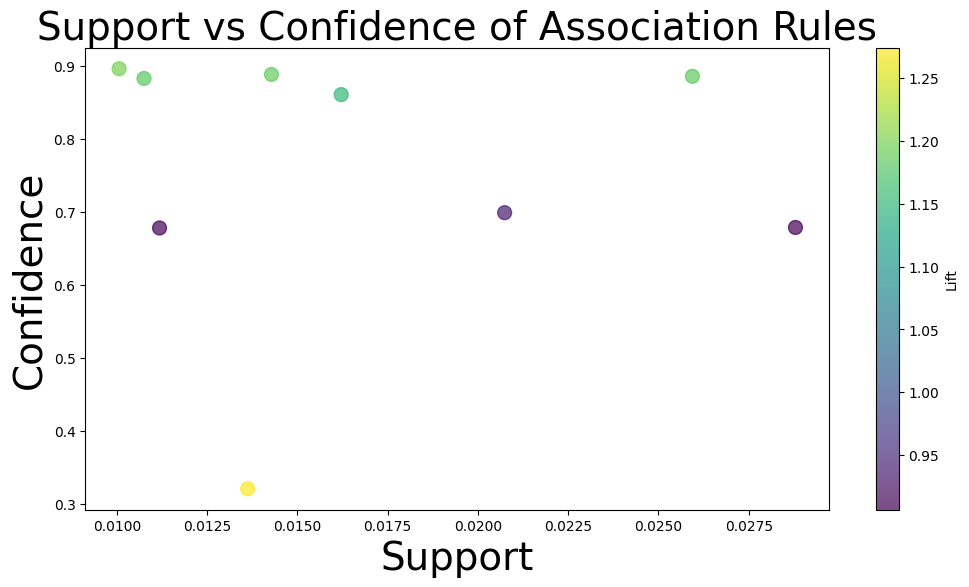

In [49]:


from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Step 1: Prepare the dataset
# Select SYMBOL and CLASS columns
pattern_df = df[['SYMBOL', 'CLASS']].copy()

# One-hot encode the SYMBOL column
symbol_encoded = pd.get_dummies(pattern_df['SYMBOL'], prefix='SYMBOL')

# Add CLASS columns (binary encoding for CLASS 0 and CLASS 1)
pattern_df['CLASS_0'] = (pattern_df['CLASS'] == 0).astype(int)
pattern_df['CLASS_1'] = (pattern_df['CLASS'] == 1).astype(int)

# Combine SYMBOL encoding with CLASS binary columns
transaction_df = pd.concat([symbol_encoded, pattern_df[['CLASS_0', 'CLASS_1']]], axis=1)

# Step 2: Apply Apriori algorithm
# Run Apriori to find frequent itemsets
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

# Print top 10 frequent itemsets
print("\nTop 10 Frequent Itemsets:")
print(frequent_itemsets.head(10))

# Step 3: Generate association rules
num_itemsets = len(frequent_itemsets)
# Generate rules with confidence > 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3, num_itemsets = num_itemsets)

# Print top 10 rules
print("\nTop 10 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Step 4: Filter rules specific to CLASS_0
class_0_rules = rules[rules['consequents'].astype(str).str.contains('CLASS_0')]
print("\nInteresting Rules for CLASS 0:")
print(class_0_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Step 5: Visualize Support vs Confidence
plt.figure(figsize=(12, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis', s=100)
plt.colorbar(label='Lift')
plt.xlabel('Support', fontsize = 28)
plt.ylabel('Confidence', fontsize = 28)
plt.title('Support vs Confidence of Association Rules', fontsize = 28)
plt.show()


 The dataset seems sparse, and the patterns discovered are weak due to low SYMBOL frequencies and possible CLASS imbalance.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1920x1440 with 0 Axes>

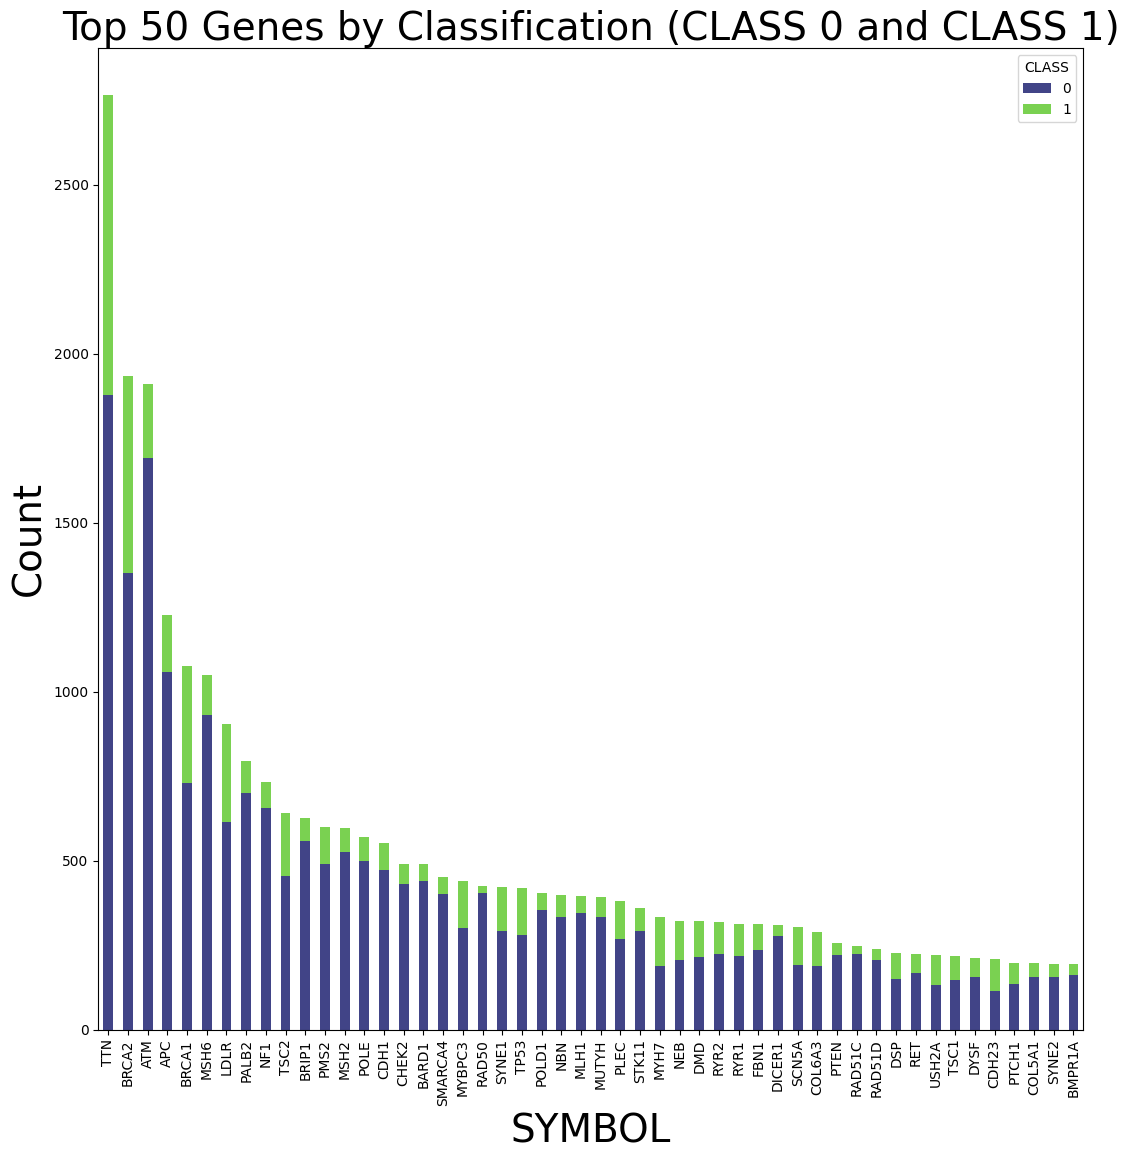

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a crosstab for SYMBOL and CLASS
gene_ct = pd.crosstab(df['SYMBOL'], df['CLASS'])

# Step 2: Compute the total counts for sorting
gene_ct['Total'] = gene_ct.sum(axis=1)  # Add a 'Total' column for sorting

# Step 3: Sort SYMBOLs by total count and select the top 50
gene_ct = gene_ct.sort_values(by='Total', ascending=False).head(50)

# Step 4: Drop the 'Total' column before plotting
gene_ct.drop('Total', axis=1, inplace=True)

# Step 5: Plot a stacked bar chart for the top 50 SYMBOLs using viridis color palette
viridis_colors = plt.cm.viridis([0.2, 0.8])  # Select two colors from the viridis palette

plt.figure(dpi=300)

gene_ct.plot.bar(stacked=True, figsize=(33.1/3, 46.8/4), color=viridis_colors)
plt.title('Top 50 Genes by Classification (CLASS 0 and CLASS 1)', fontsize=28)
plt.xlabel('SYMBOL', fontsize=28)
plt.ylabel('Count', fontsize=28)
plt.xticks(rotation=90)
plt.legend(title='CLASS')
plt.tight_layout()
plt.show()


It is clearly visible that that for the most part the classifications aren't conflicting, but it is, also, clearly visible that a lot are conflicting.

ignore this for now

```
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Select features for prediction
features = ['SIFT', 'PolyPhen', 'CADD_PHRED', 'AF_ESP', 'AF_EXAC', 'AF_TGP']
target = 'CLASS'

# Drop rows with missing values
df_ml = df[features + [target]].dropna()

# Encode categorical features (SIFT, PolyPhen)
df_ml = pd.get_dummies(df_ml, columns=['SIFT', 'PolyPhen'], drop_first=True)

# Split the data into train and test
X = df_ml.drop('CLASS', axis=1)
y = df_ml['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Print classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



ignore this for now

```
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Cleaned Dataset
file_path = 'clinvar_cleaned.csv'  # Replace with your cleaned file path
df = pd.read_csv(file_path)

# Step 2: Select Features and Target
# Use numerical columns like AF_ESP, AF_EXAC, AF_TGP as predictors
X = df[['AF_ESP', 'AF_EXAC', 'AF_TGP']]  # Replace with relevant features
y = df['CLASS']  # Binary target: CLASS 0 or 1

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = linear_model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
```




ignore this for now
```
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Step 1: Select Features and Target
X = df[['AF_ESP', 'AF_EXAC', 'AF_TGP']]  # Replace with relevant features
y = df['CLASS']  # Binary target: CLASS 0 or 1

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Decision Tree Model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limit depth for interpretability
tree_model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = tree_model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Results:")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(29, 15))
plot_tree(tree_model, feature_names=['AF_ESP', 'AF_EXAC', 'AF_TGP'], class_names=['CLASS 0', 'CLASS 1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
```

